In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

# Loading

In [2]:
df = pd.read_csv("HW5_PRSA_Data_Tiantan.csv")
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,20.0,48.0,2.0,NaN,500.0,NaN,12.5,1013.5,-16.2,0.0,NW,2.4,Tiantan
35060,35061,2017,2,28,20,11.0,34.0,3.0,36.0,500.0,NaN,11.6,1013.6,-15.1,0.0,WNW,0.9,Tiantan
35061,35062,2017,2,28,21,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1,Tiantan
35062,35063,2017,2,28,22,15.0,42.0,5.0,52.0,600.0,44.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Tiantan


# Grouping

In [3]:
df['datetime']=df['year'].astype(str).str.cat([df['month'].astype(str),df['day'].astype(str),df['hour'].astype(str)], sep='-')
df['datetime']=pd.to_datetime(df['datetime'],format='%Y-%m-%d-%H')
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan,2013-03-01 00:00:00
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan,2013-03-01 01:00:00
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,20.0,48.0,2.0,NaN,500.0,NaN,12.5,1013.5,-16.2,0.0,NW,2.4,Tiantan,2017-02-28 19:00:00
35060,35061,2017,2,28,20,11.0,34.0,3.0,36.0,500.0,NaN,11.6,1013.6,-15.1,0.0,WNW,0.9,Tiantan,2017-02-28 20:00:00
35061,35062,2017,2,28,21,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1,Tiantan,2017-02-28 21:00:00
35062,35063,2017,2,28,22,15.0,42.0,5.0,52.0,600.0,44.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Tiantan,2017-02-28 22:00:00


In [4]:
df=df.set_index(df['datetime'])
df.drop(['datetime'],axis=1,inplace=True)
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
2013-03-01 01:00:00,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2013-03-01 02:00:00,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,35060,2017,2,28,19,20.0,48.0,2.0,NaN,500.0,NaN,12.5,1013.5,-16.2,0.0,NW,2.4,Tiantan
2017-02-28 20:00:00,35061,2017,2,28,20,11.0,34.0,3.0,36.0,500.0,NaN,11.6,1013.6,-15.1,0.0,WNW,0.9,Tiantan
2017-02-28 21:00:00,35062,2017,2,28,21,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1,Tiantan


In [5]:
df = df.resample('D').mean().round(2)
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,,,,,,
2013-03-01,12.5,2013.0,3.0,1.0,11.5,8.62,14.46,8.88,21.58,450.00,68.08,1.32,1028.78,-21.47,0.0,3.31
2013-03-02,36.5,2013.0,3.0,2.0,11.5,31.71,37.04,27.17,50.48,934.78,34.04,0.49,1028.85,-16.96,0.0,0.79
2013-03-03,60.5,2013.0,3.0,3.0,11.5,98.04,121.33,55.62,82.96,2028.96,16.92,4.99,1016.46,-12.31,0.0,1.22
2013-03-04,84.5,2013.0,3.0,4.0,11.5,22.33,37.58,16.58,42.04,895.79,53.12,10.56,1019.45,-14.00,0.0,2.50
2013-03-05,108.5,2013.0,3.0,5.0,11.5,141.67,156.38,74.33,101.67,2408.00,94.00,7.21,1012.70,-7.78,0.0,0.91


# Visualize

Get the univariable pressure

In [6]:
df1 = pd.DataFrame()
df1["PRES_avg"] = df[["PRES"]].copy()
df1

,PRES_avg
datetime,
2013-03-01,1028.78
2013-03-02,1028.85
2013-03-03,1016.46
2013-03-04,1019.45
2013-03-05,1012.70
...,...
2017-02-24,1021.01
2017-02-25,1018.81
2017-02-26,1020.34


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2013-03-01 to 2017-02-28
Freq: D
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PRES_avg  1461 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB


In [8]:
df1.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
PRES_avg,1461.0,1012.552183,10.064326,990.35,1004.02,1012.47,1020.96,1039.95


<AxesSubplot:xlabel='datetime'>

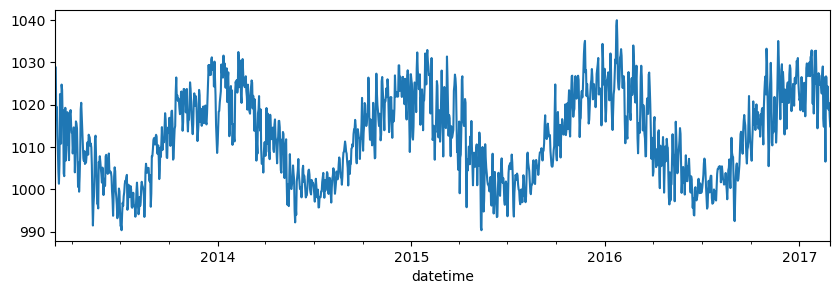

In [9]:
df1['PRES_avg'].plot(figsize=(10,3))

Additive

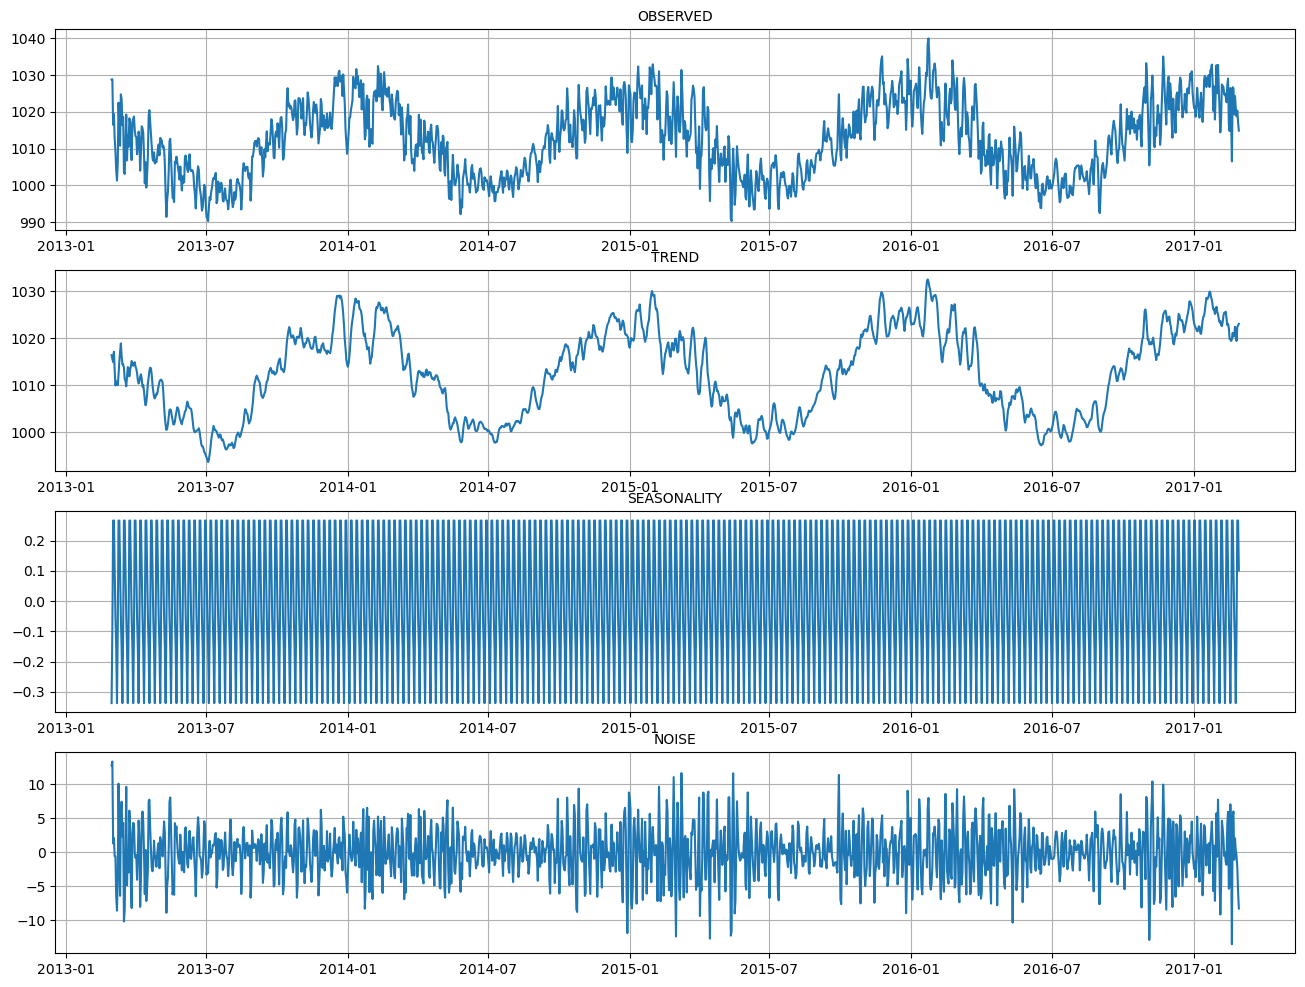

In [10]:
res=sm.tsa.seasonal_decompose(df1['PRES_avg'],model='additive',extrapolate_trend ='freq')
fig, axs = plt.subplots(4, figsize=(16,12))
axs[0].set_title('OBSERVED', fontsize=10)
axs[0].plot(res.observed)
axs[0].grid()

axs[1].set_title('TREND', fontsize=10)
axs[1].plot(res.trend)
axs[1].grid()

axs[2].set_title('SEASONALITY', fontsize=10)
axs[2].plot(res.seasonal)
axs[2].grid()

axs[3].set_title('NOISE', fontsize=10)
axs[3].plot(res.resid)
axs[3].grid()

plt.show()

# PREPROCESSING

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
df1["PRES_avg"] = scaler.fit_transform(df1[['PRES_avg']])

In [12]:
train_end = "2017-01-31"
test_start = "2017-02-01"

In [13]:
df_train = df1[:train_end]
df_test = df1[test_start:]

In [14]:
df_train

,PRES_avg
datetime,
2013-03-01,0.774798
2013-03-02,0.776210
2013-03-03,0.526411
2013-03-04,0.586694
2013-03-05,0.450605
...,...
2017-01-27,0.736694
2017-01-28,0.555847
2017-01-29,0.699798


In [15]:
df_test

,PRES_avg
datetime,
2017-02-01,0.854839
2017-02-02,0.727016
2017-02-03,0.582661
2017-02-04,0.485282
2017-02-05,0.561089
2017-02-06,0.747782
2017-02-07,0.740121
2017-02-08,0.734879
2017-02-09,0.692339


In [16]:
df_train['p_lag1']=df_train['PRES_avg'].shift(1)
df_train['p_forward1']=df_train['PRES_avg'].shift(-1)
df_train['p_ma2']=df_train['PRES_avg'].rolling(2).mean()
df_train['p_d1']=df_train['PRES_avg']-df_train['p_lag1']
df_train

,PRES_avg,p_lag1,p_forward1,p_ma2,p_d1
datetime,,,,,
2013-03-01,0.774798,NaN,0.776210,NaN,NaN
2013-03-02,0.776210,0.774798,0.526411,0.775504,0.001411
2013-03-03,0.526411,0.776210,0.586694,0.651310,-0.249798
2013-03-04,0.586694,0.526411,0.450605,0.556552,0.060282
2013-03-05,0.450605,0.586694,0.382056,0.518649,-0.136089
...,...,...,...,...,...
2017-01-27,0.736694,0.602419,0.555847,0.669556,0.134274
2017-01-28,0.555847,0.736694,0.699798,0.646270,-0.180847
2017-01-29,0.699798,0.555847,0.853024,0.627823,0.143952


# ACF & PACF

<AxesSubplot:xlabel='datetime'>

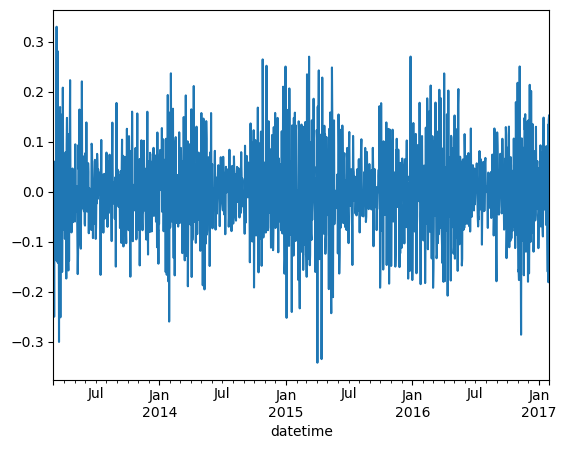

In [17]:
df_train['p_d1'].plot()

In [18]:
#adfuller test the data is stationary or not. H0: no stationnary
from statsmodels.tsa.stattools import adfuller
result = adfuller(sm.tsa.statespace.tools.diff(df_train['PRES_avg'],k_diff=1,k_seasonal_diff=None, seasonal_periods=1), autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -16.7076257362659
n_lags: 1.44355176433058e-29
p-value: 1.44355176433058e-29
Critial Values:
   1%, -3.434966750462565
Critial Values:
   5%, -2.8635789736973725
Critial Values:
   10%, -2.5678555388041384


k_diff = 1 is ok

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

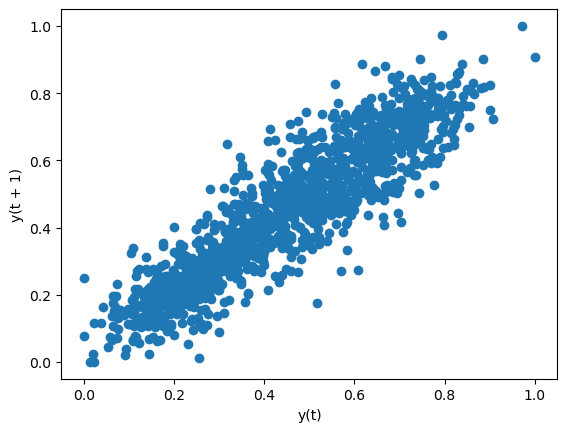

In [19]:
pd.plotting.lag_plot(df_train['PRES_avg'])

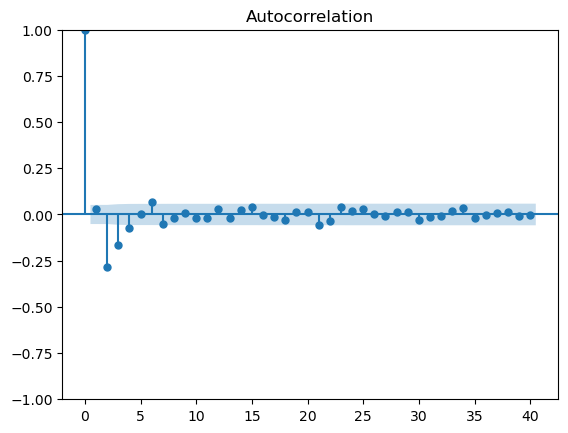

In [20]:
sm.graphics.tsa.plot_acf(df_train['p_d1'][1:],lags=40)
plt.show()

q = 3

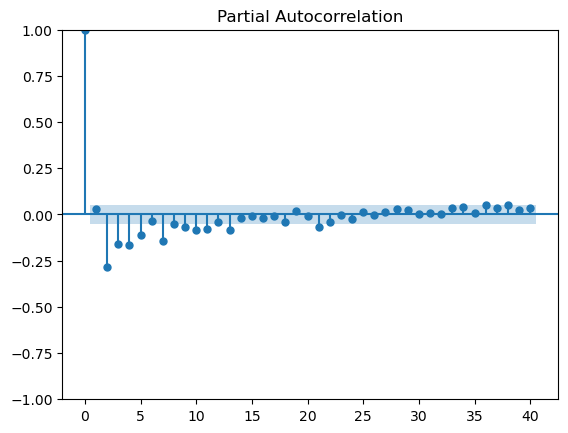

In [21]:
sm.graphics.tsa.plot_pacf(df_train['p_d1'][1:],lags=40)
plt.show()

p = 7

order

In [22]:
order = (7,1,3)

In [23]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(df_train['PRES_avg'], order=order, trend=None, exog=None, missing='drop',seasonal_order=(1,1,0,30))
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                          PRES_avg   No. Observations:                 1433
Model:             ARIMA(7, 1, 3)x(1, 1, [], 30)   Log Likelihood                1321.138
Date:                           Sun, 11 Feb 2024   AIC                          -2618.277
Time:                                   21:26:17   BIC                          -2555.329
Sample:                               03-01-2013   HQIC                         -2594.747
                                    - 01-31-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0586      0.310     -0.189      0.850      -0.667       0.549
ar.L2         -0.1530      0.217     -0.706      0.480      -0.578       0.272
ar.L3          0.1559      0.177      0.883      0.377      -0.190       0.502
ar.L4         -0.1535      0.085     -1.801      0.072      -0.320       0.014
ar.L5       5.781e-05      0.031      0.002      0.999      -0.061       0.061
ar.L6          0.0336      0.031      1.073      0.283      -0.028       0.095
ar.L7         -0.0431      0.036     -1.193      0.233      -0.114       0.028
ma.L1         -0.0683      0.310     -0.220      0.826      -0.675       0.539
ma.L2         -0.2677      0.227     -1.180      0.238      -0.712       0.177
ma.L3         -0.4482      0.266     -1.683      0.092      -0.970       0.074
ar.S.L30      -0.5089      0.022    -23.529      0.000      -0.551      -0.466
sigma2         0.0088      0.000     29.694      0.000       0.008       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                44.02
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                            -0.23
Prob(H) (two-sided):                  0.80   Kurtosis:                         3.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
pred=result.predict(start=test_start,end='2017-2-28')
df_test['pred_arima']=pred
df_test

,PRES_avg,pred_arima
datetime,,
2017-02-01,0.854839,0.589196
2017-02-02,0.727016,0.543628
2017-02-03,0.582661,0.679797
2017-02-04,0.485282,0.706519
2017-02-05,0.561089,0.673540
2017-02-06,0.747782,0.576263
2017-02-07,0.740121,0.672039
2017-02-08,0.734879,0.719967
2017-02-09,0.692339,0.701094


In [25]:
print('MAPE:', mean_absolute_percentage_error(df_test['PRES_avg'],df_test['pred_arima']))

MAPE: 0.2534698542146194


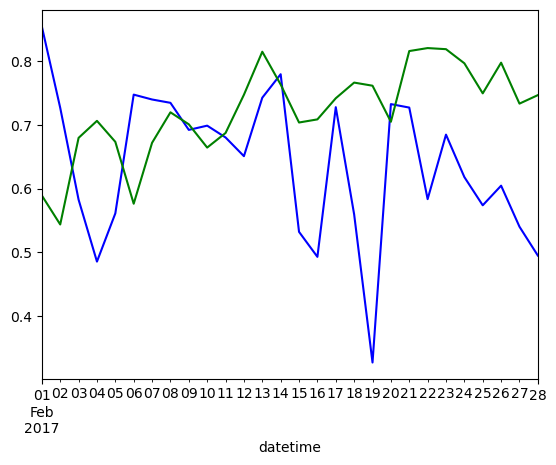

In [ ]:
df_test['PRES_avg'].plot(color='blue')
df_test['pred_arima'].plot(color='green')
plt.show()

# Predict

Train again with full dataset

In [ ]:
df_train_ = df1.copy()

In [ ]:
model_=ARIMA(df_train_['PRES_avg'], order=order, trend=None, exog=None, missing='drop',seasonal_order=(1,1,0,30))
result_=model_.fit()
result_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                          PRES_avg   No. Observations:                 1461
Model:             ARIMA(7, 1, 3)x(1, 1, [], 30)   Log Likelihood                1329.999
Date:                           Fri, 09 Feb 2024   AIC                          -2635.999
Time:                                   14:08:48   BIC                          -2572.814
Sample:                               03-01-2013   HQIC                         -2612.404
                                    - 02-28-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1488      0.463     -0.321      0.748      -1.057       0.760
ar.L2         -0.0556      0.232     -0.240      0.810      -0.510       0.399
ar.L3          0.1004      0.204      0.491      0.623      -0.300       0.501
ar.L4         -0.1339      0.104     -1.288      0.198      -0.338       0.070
ar.L5         -0.0118      0.034     -0.352      0.725      -0.078       0.054
ar.L6          0.0285      0.034      0.838      0.402      -0.038       0.095
ar.L7         -0.0277      0.042     -0.656      0.512      -0.111       0.055
ma.L1          0.0112      0.462      0.024      0.981      -0.894       0.917
ma.L2         -0.3910      0.248     -1.575      0.115      -0.878       0.096
ma.L3         -0.3948      0.362     -1.089      0.276      -1.105       0.316
ar.S.L30      -0.5083      0.022    -23.400      0.000      -0.551      -0.466
sigma2         0.0090      0.000     30.097      0.000       0.008       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                42.70
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                            -0.19
Prob(H) (two-sided):                  0.21   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

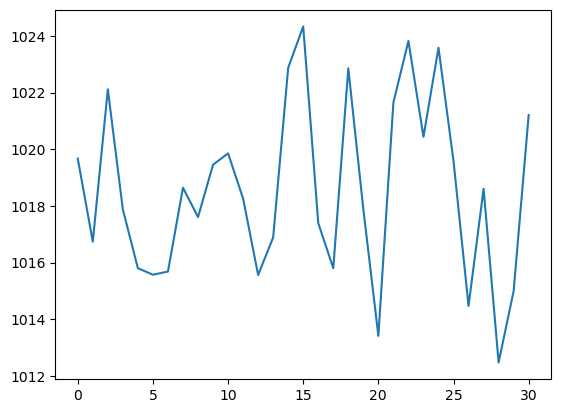

In [ ]:
march_scaled = [[i] for i in result_.predict(start='2017-3-1',end='2017-3-31')]
march = pd.core.series.Series([i[0] for i in scaler.inverse_transform(march_scaled)])
march.plot()
plt.show()

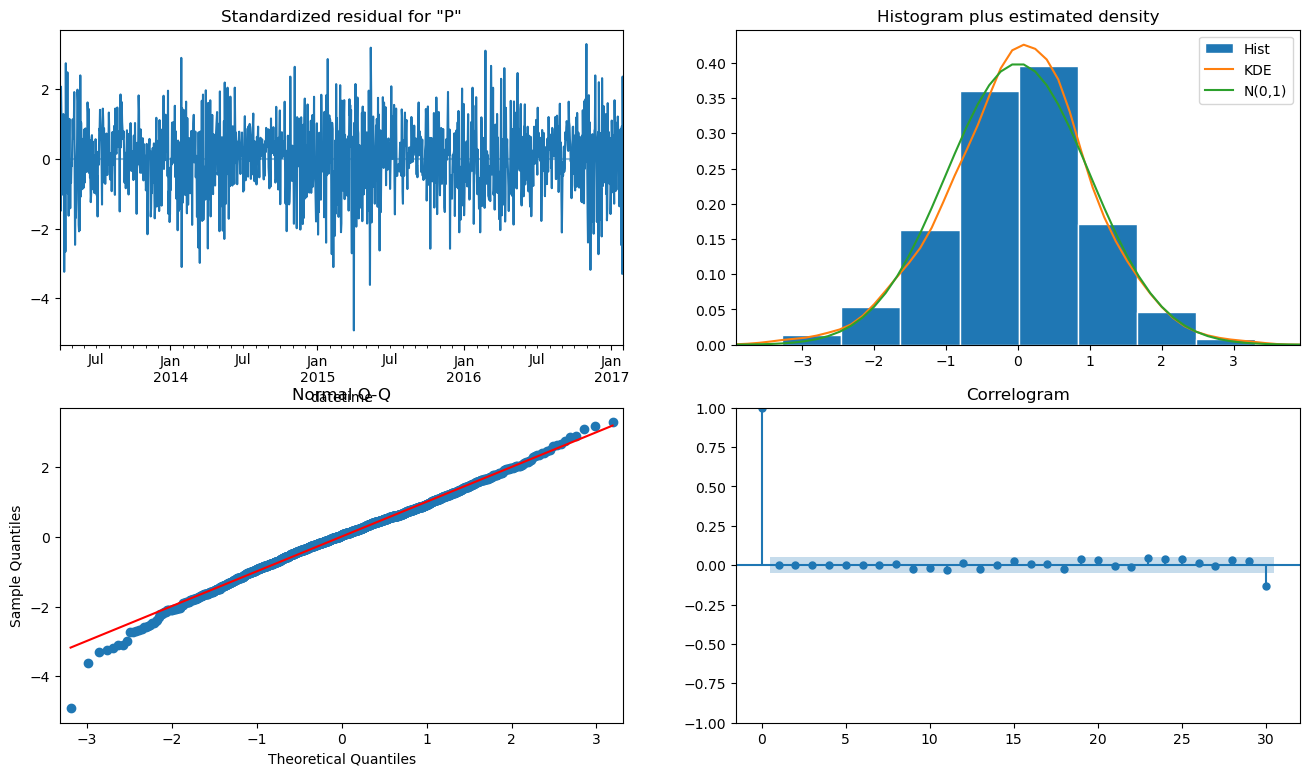

In [ ]:
result.plot_diagnostics(figsize=(16,9),lags=30)
plt.show()

# Evaluation

### I do not think that the ARIMA model is very useful:

1: The prediction want the month of March but we use daily grouping

2: The prediction it made vs the test set is approximately equal but it does not seem to capture the nuances as much as it could